In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

### Reading DATA
* Cleaning unnecessary columns
* filling NaN values

In [23]:
df=pd.read_csv('Asthma.csv')

controlled = (df['Number_of_ER_Visits'] == 0) & (df['Medication_Adherence'] >= np.mean(df['Medication_Adherence']))
not_controlled = (df['Number_of_ER_Visits'] >= 5) & (df['Medication_Adherence'] < np.mean(df['Medication_Adherence']))

df.loc[df['Asthma_Control_Level'].isna() & controlled, 'Asthma_Control_Level'] = 'Controlled'
df.loc[df['Asthma_Control_Level'].isna() & not_controlled, 'Asthma_Control_Level'] = 'Not Controlled'
df.loc[df['Asthma_Control_Level'].isna() & ~(controlled | not_controlled), 'Asthma_Control_Level'] = 'Poorly Controlled'

for col in df.columns:
    if df[col].dtype == 'object':
        df.fillna({col:'Missing'}, inplace=True)

df.drop('Patient_ID', axis=1, inplace=True)
df.rename(columns={'Smoking_Status': 'Smoker', 'Has_Asthma': 'Asthmatic'}, inplace=True)

df.head()

,Age,Gender,BMI,Smoker,Family_History,Allergies,Air_Pollution_Level,Physical_Activity_Level,Occupation_Type,Comorbidities,Medication_Adherence,Number_of_ER_Visits,Peak_Expiratory_Flow,FeNO_Level,Asthmatic,Asthma_Control_Level
0,52,Female,27.6,Former,1,Missing,Moderate,Sedentary,Outdoor,Diabetes,0.38,0,421.0,46.0,0,Poorly Controlled
1,15,Male,24.6,Former,0,Dust,Low,Moderate,Indoor,Both,0.60,2,297.6,22.9,0,Poorly Controlled
2,72,Female,17.6,Never,0,Missing,Moderate,Moderate,Indoor,Missing,0.38,0,303.3,15.3,0,Poorly Controlled
3,61,Male,16.8,Never,0,Multiple,High,Sedentary,Outdoor,Both,0.60,1,438.0,40.1,1,Poorly Controlled
4,21,Male,30.2,Never,0,Missing,Moderate,Active,Indoor,Missing,0.82,3,535.0,27.7,0,Poorly Controlled


### DATA information
* No of Rows and Columns
* No of NaN values
* Unique values of columns

In [24]:
print('Number of rows:',df.shape[0])
print('Number of columns:',df.shape[1])

Number of rows: 10000
Number of columns: 16


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      10000 non-null  int64  
 1   Gender                   10000 non-null  object 
 2   BMI                      10000 non-null  float64
 3   Smoker                   10000 non-null  object 
 4   Family_History           10000 non-null  int64  
 5   Allergies                10000 non-null  object 
 6   Air_Pollution_Level      10000 non-null  object 
 7   Physical_Activity_Level  10000 non-null  object 
 8   Occupation_Type          10000 non-null  object 
 9   Comorbidities            10000 non-null  object 
 10  Medication_Adherence     10000 non-null  float64
 11  Number_of_ER_Visits      10000 non-null  int64  
 12  Peak_Expiratory_Flow     10000 non-null  float64
 13  FeNO_Level               10000 non-null  float64
 14  Asthmatic              

In [26]:
df.isnull().sum()

Age                        0
Gender                     0
BMI                        0
Smoker                     0
Family_History             0
Allergies                  0
Air_Pollution_Level        0
Physical_Activity_Level    0
Occupation_Type            0
Comorbidities              0
Medication_Adherence       0
Number_of_ER_Visits        0
Peak_Expiratory_Flow       0
FeNO_Level                 0
Asthmatic                  0
Asthma_Control_Level       0
dtype: int64

In [27]:
for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique values")

Age: 89 unique values
Gender: 3 unique values
BMI: 254 unique values
Smoker: 3 unique values
Family_History: 2 unique values
Allergies: 5 unique values
Air_Pollution_Level: 3 unique values
Physical_Activity_Level: 3 unique values
Occupation_Type: 2 unique values
Comorbidities: 4 unique values
Medication_Adherence: 100 unique values
Number_of_ER_Visits: 7 unique values
Peak_Expiratory_Flow: 3468 unique values
FeNO_Level: 497 unique values
Asthmatic: 2 unique values
Asthma_Control_Level: 4 unique values


### EDA
* Plotting different correlations between columns


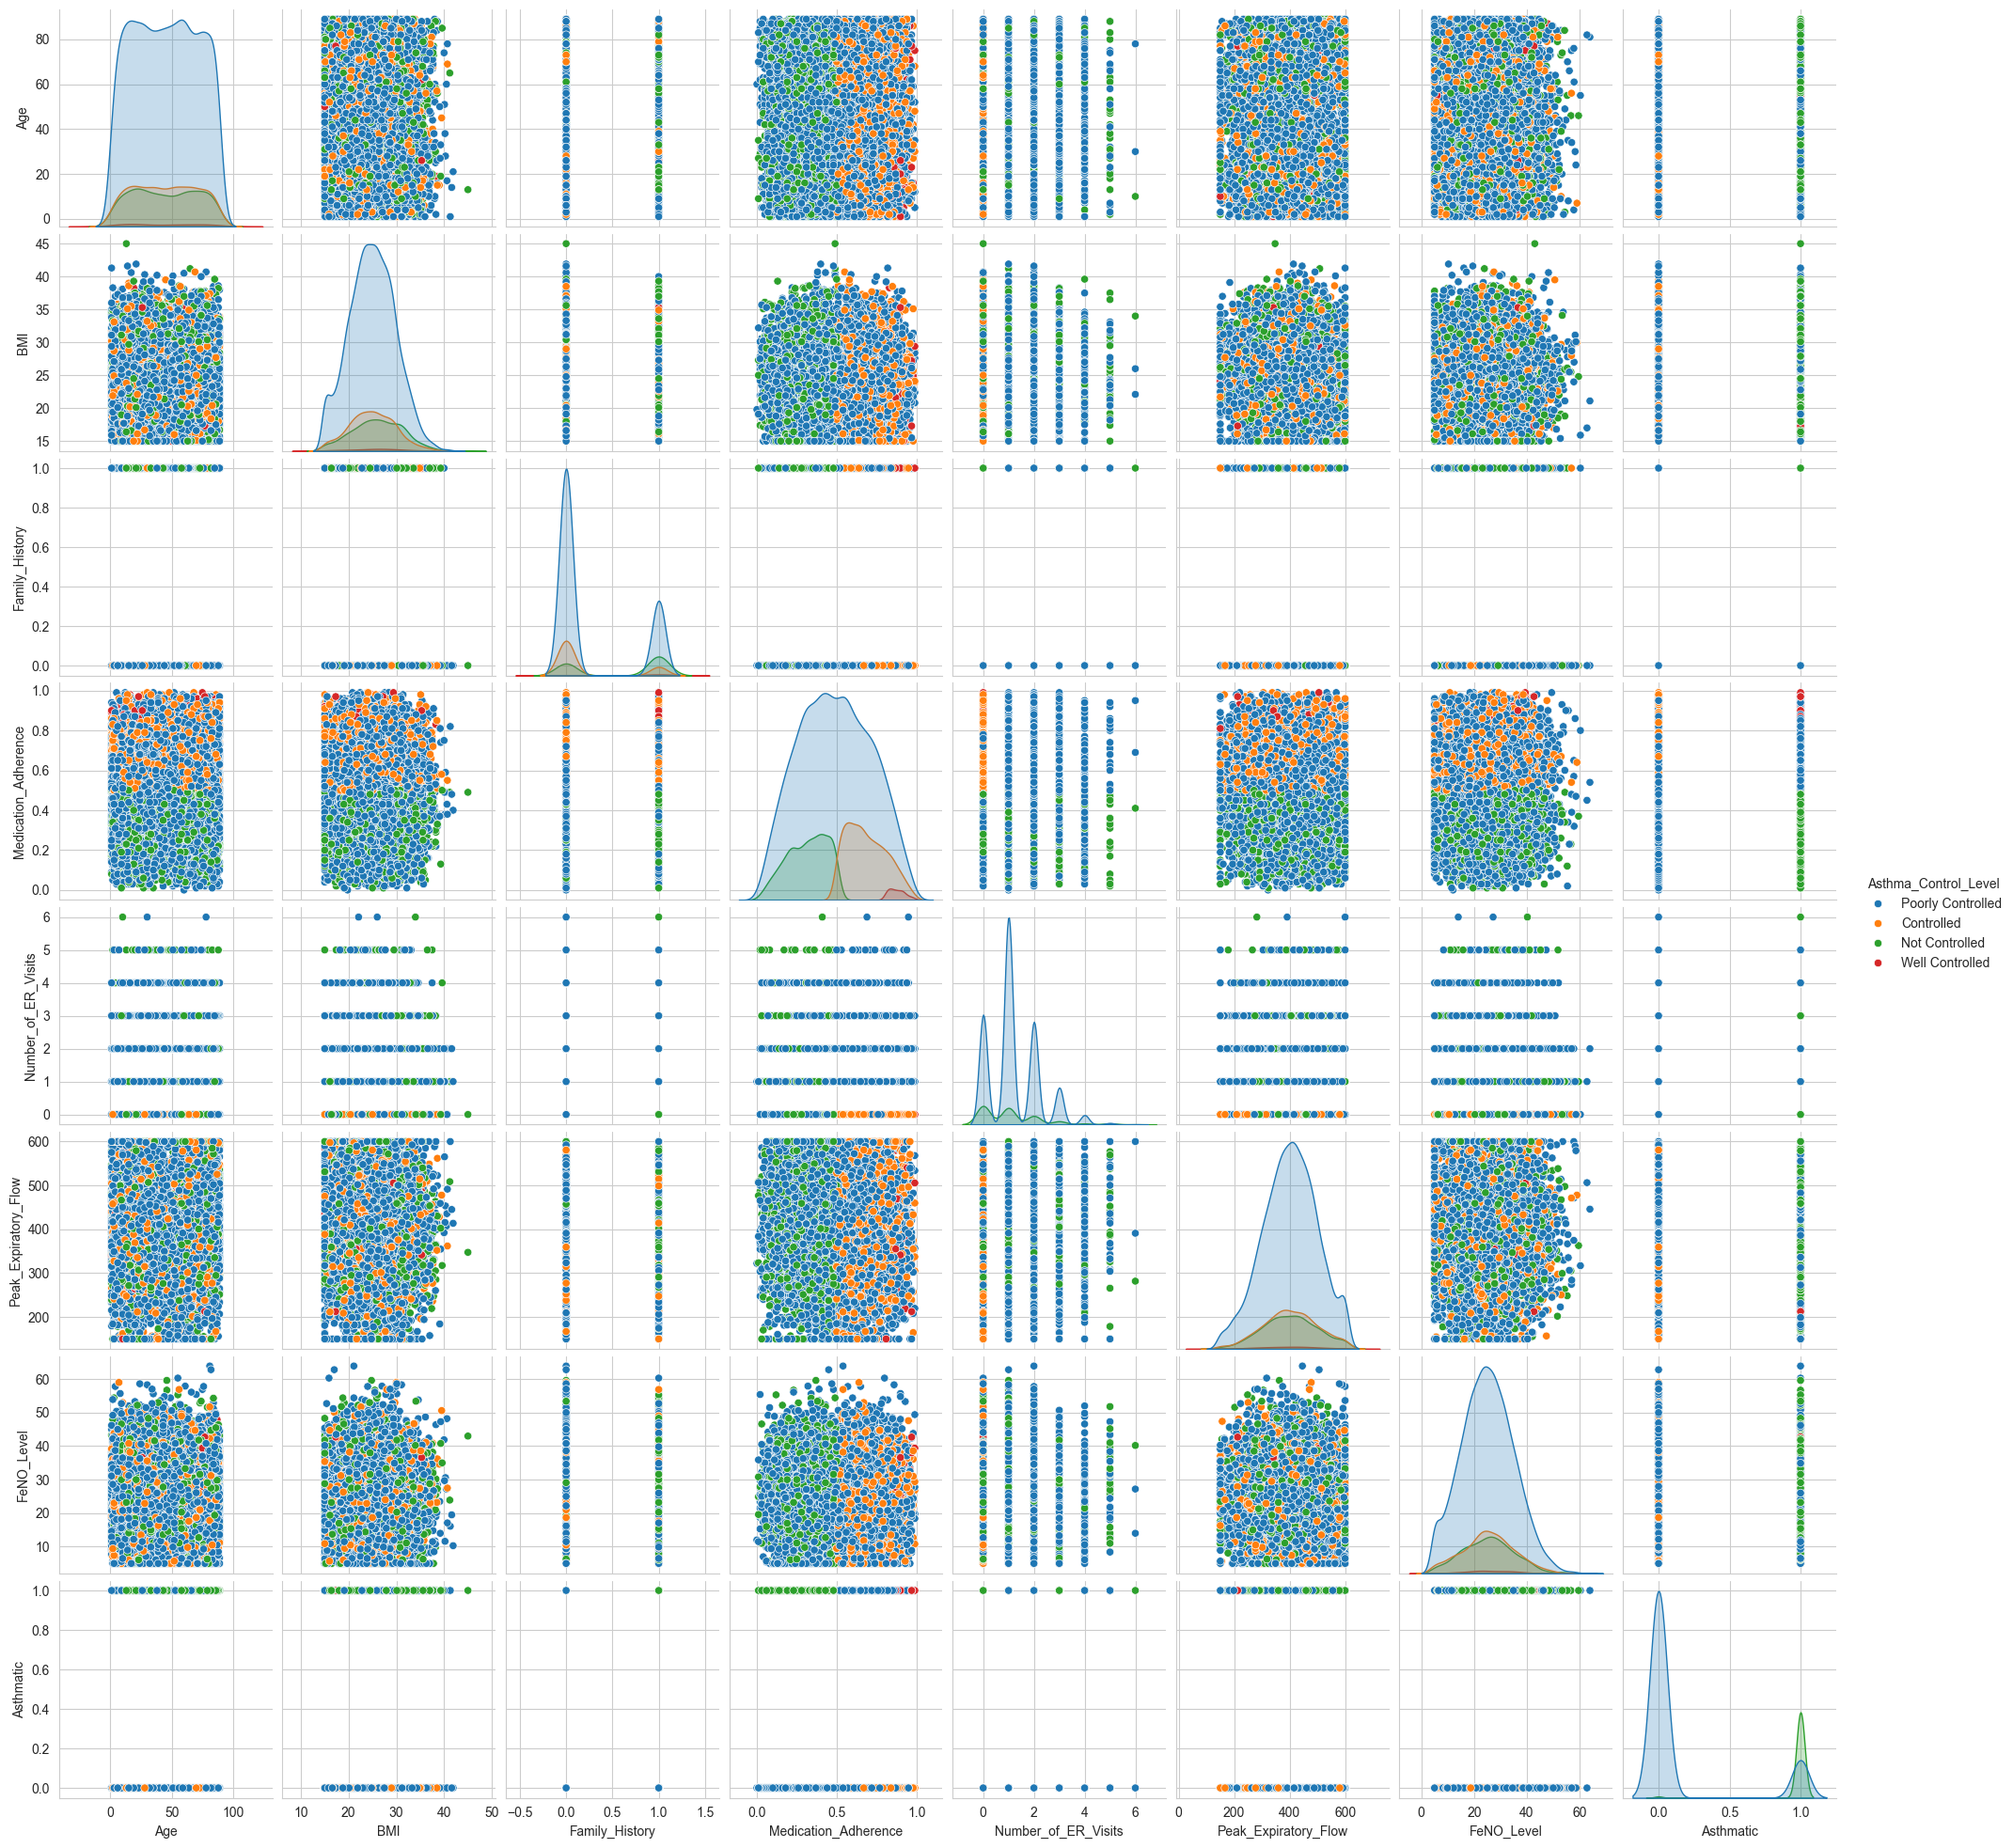

In [28]:
sns.pairplot(df,hue='Asthma_Control_Level',diag_kind='kde')

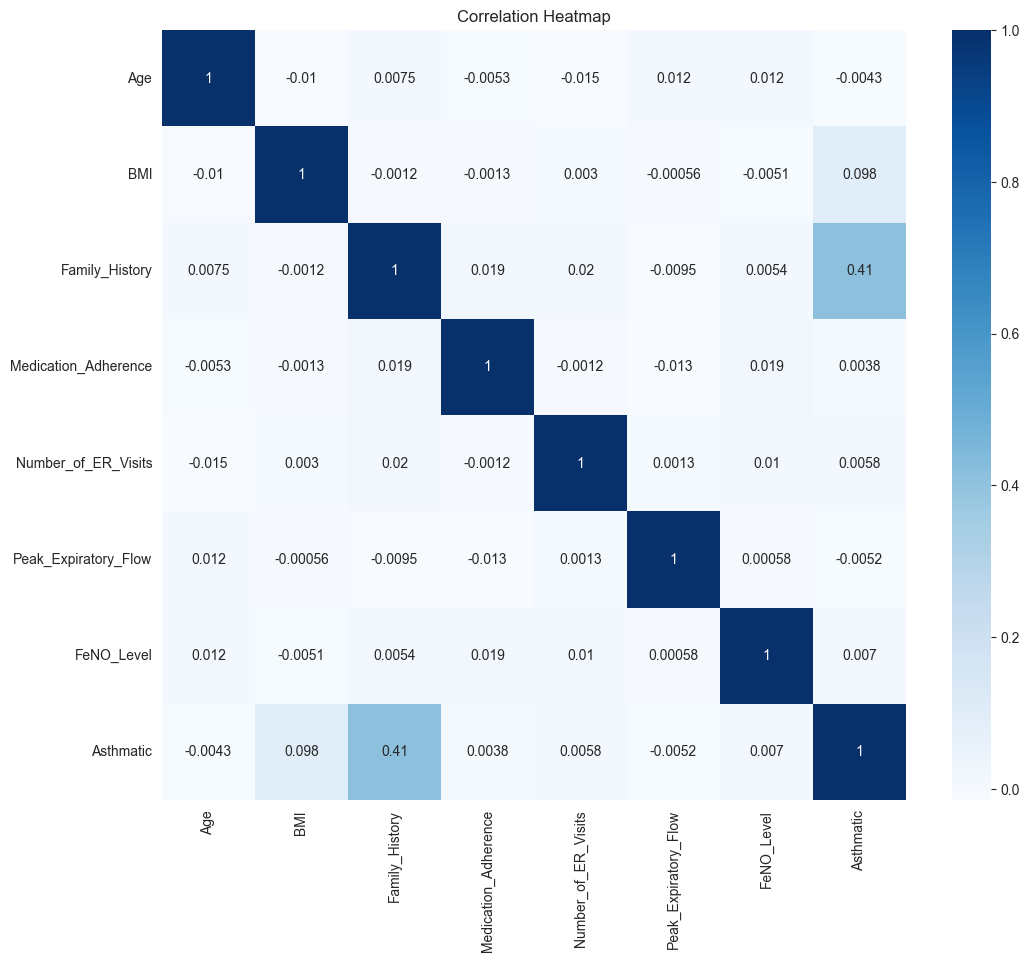

In [29]:
plt.figure(figsize=(12,10))
sns.heatmap(df.select_dtypes('number').corr(), annot=True,cmap=plt.cm.Blues)
plt.title('Correlation Heatmap')
plt.show()

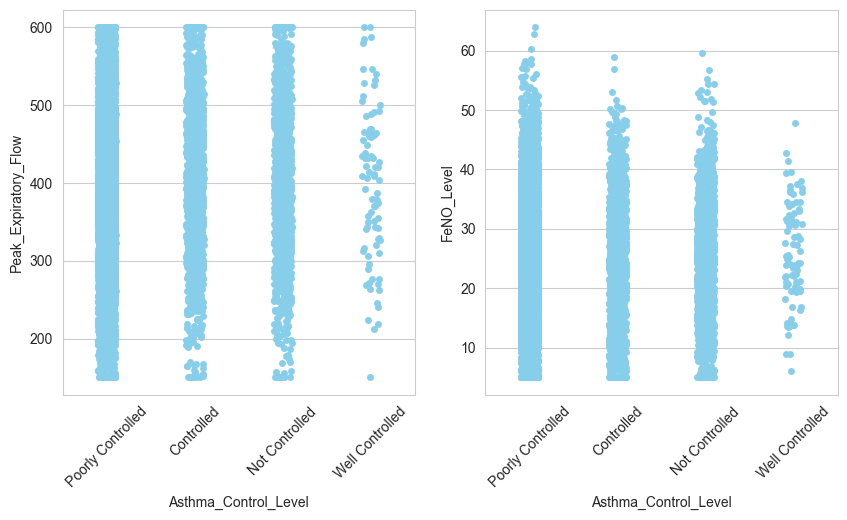

In [30]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(10,5))
sns.stripplot(data=df,x='Asthma_Control_Level',y='Peak_Expiratory_Flow',ax=ax1,color='skyblue')
sns.stripplot(data=df,x='Asthma_Control_Level',y='FeNO_Level',ax=ax2,color='skyblue')
ax1.tick_params(axis='x',labelrotation=45)
ax2.tick_params(axis='x',labelrotation=45)

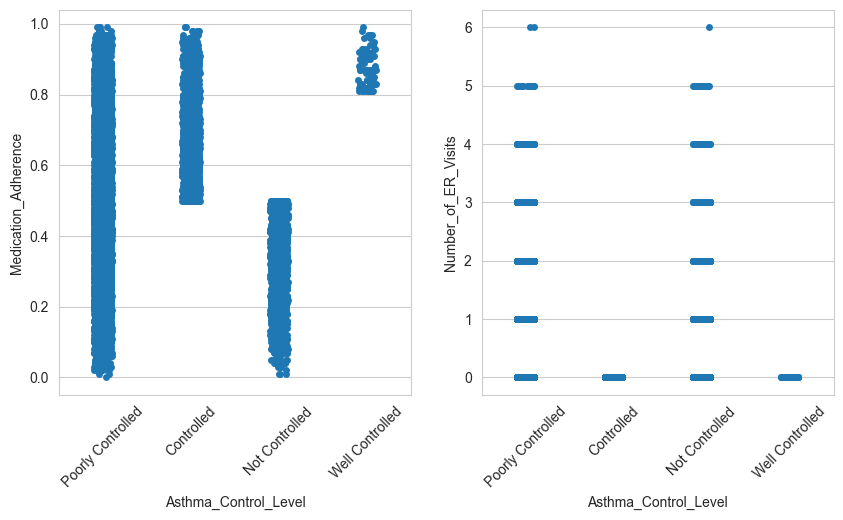

In [31]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(10,5))
sns.stripplot(data=df,x='Asthma_Control_Level',y='Medication_Adherence',ax=ax1)
sns.stripplot(data=df,x='Asthma_Control_Level',y='Number_of_ER_Visits',ax=ax2)
ax1.tick_params(axis='x',labelrotation=45)
ax2.tick_params(axis='x',labelrotation=45)

Smoker
Never      6070
Former     2487
Current    1443
Name: count, dtype: int64


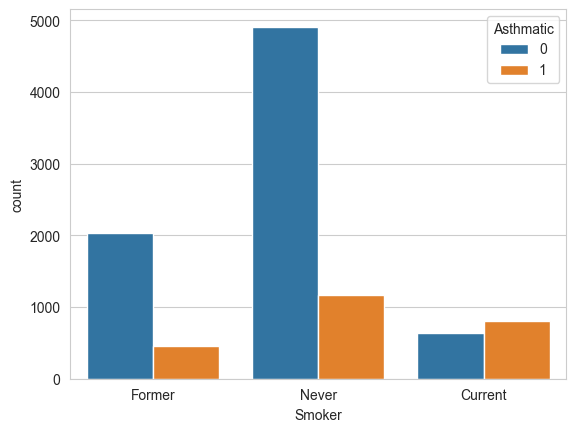

Allergies
Missing     2936
Dust        2479
Pollen      1999
Pets        1585
Multiple    1001
Name: count, dtype: int64


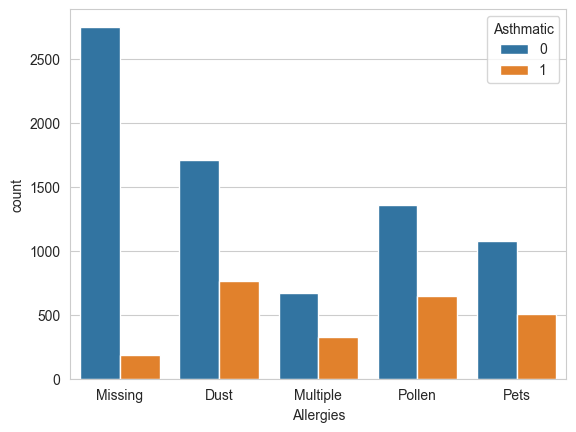

Comorbidities
Missing         4967
Diabetes        2029
Hypertension    2018
Both             986
Name: count, dtype: int64


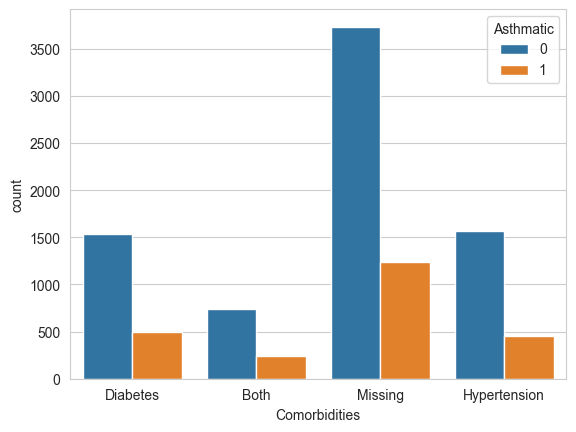

Asthma_Control_Level
Poorly Controlled    7269
Controlled           1399
Not Controlled       1248
Well Controlled        84
Name: count, dtype: int64


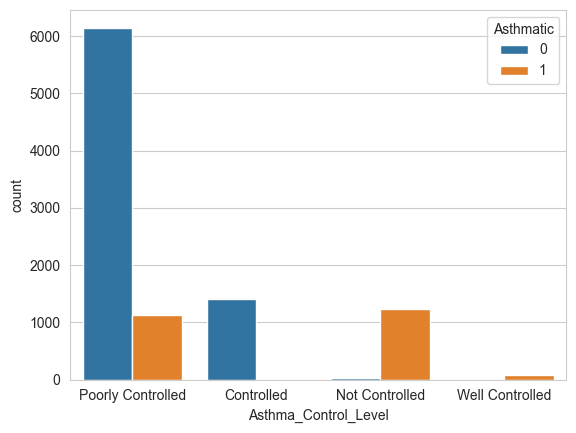

In [32]:
for col in ['Smoker', 'Allergies', 'Comorbidities', 'Asthma_Control_Level']:
    print(df[col].value_counts())
    sns.countplot(data=df, x=col, hue='Asthmatic')
    plt.show()

<Axes: xlabel='Asthma_Control_Level', ylabel='Medication_Adherence'>

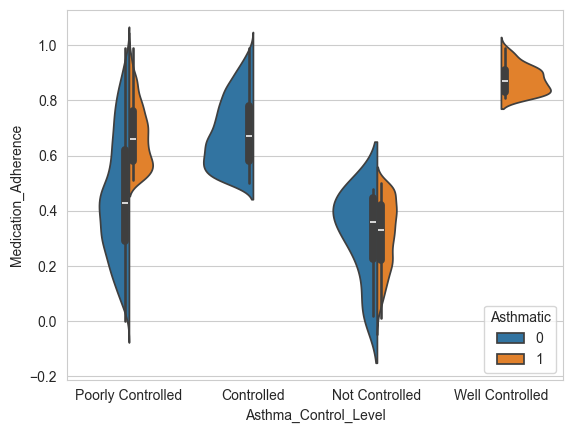

In [12]:
sns.violinplot(data=df, x='Asthma_Control_Level',y='Medication_Adherence',hue='Asthmatic',split=True)

Text(0.5, 1.0, 'Asthma Control level VS. FeNo Level')

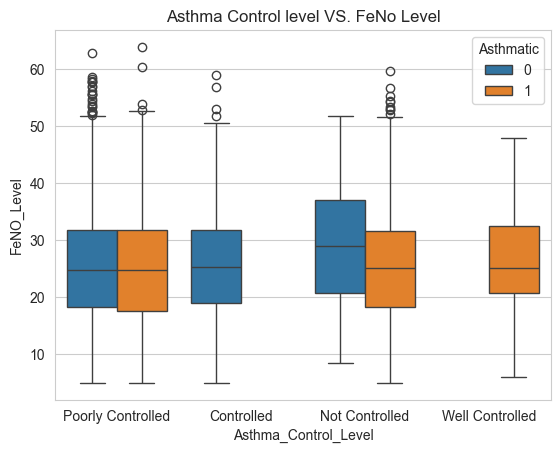

In [33]:
sns.boxplot(data=df,x='Asthma_Control_Level',y='FeNO_Level',hue='Asthmatic')
plt.title('Asthma Control level VS. FeNo Level')

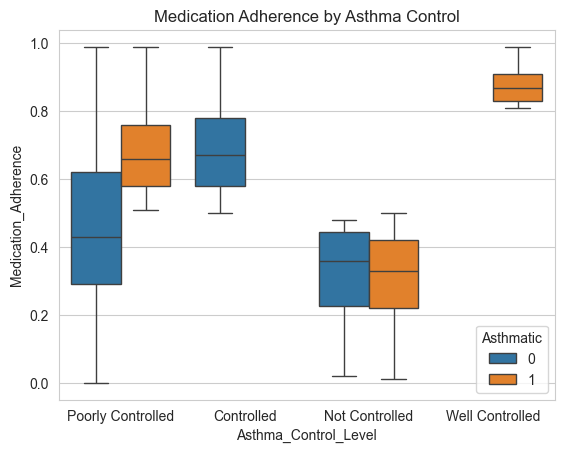

In [14]:
sns.boxplot(data=df, x='Asthma_Control_Level', y='Medication_Adherence', hue='Asthmatic')
plt.title('Medication Adherence by Asthma Control')
plt.show()

### DATA Stats

In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,10000.0,44.930700,25.653559,1.0,23.00,45.0,67.00,89.00
BMI,10000.0,25.053320,4.874466,15.0,21.60,25.0,28.40,45.00
Family_History,10000.0,0.303400,0.459749,0.0,0.00,0.0,1.00,1.00
Medication_Adherence,10000.0,0.497998,0.224809,0.0,0.32,0.5,0.67,0.99
Number_of_ER_Visits,10000.0,1.015900,1.020564,0.0,0.00,1.0,2.00,6.00
Peak_Expiratory_Flow,10000.0,400.884090,97.531113,150.0,334.80,402.5,468.70,600.00
FeNO_Level,10000.0,25.101420,9.840184,5.0,18.20,25.0,31.70,63.90
Asthmatic,10000.0,0.243300,0.429096,0.0,0.00,0.0,0.00,1.00


In [34]:
group=df.groupby('Asthmatic')
print(group['Medication_Adherence'].agg(['mean','median']))
print(group['Peak_Expiratory_Flow'].agg(['mean','median']))

               mean  median
Asthmatic                  
0          0.497516     0.5
1          0.499499     0.5
                 mean  median
Asthmatic                    
0          401.172023   402.6
1          399.988574   401.9


### Hypothesis Test 1
* H0 --> Medication Adherence doesn't have any impact on asthma control leval
* H1 --> Medication Adherence is strongly related with asthma control level

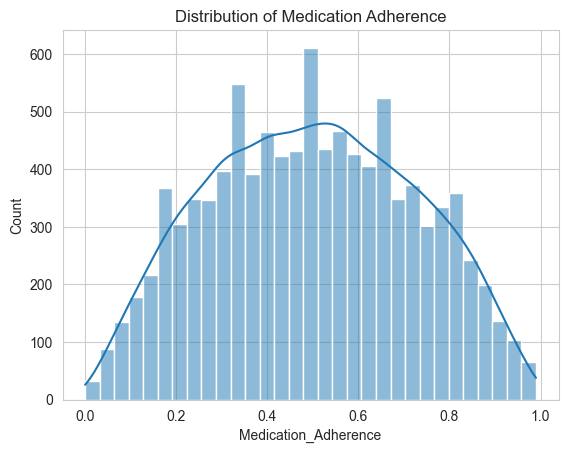

In [17]:
sns.histplot(df['Medication_Adherence'], kde=True)
plt.title('Distribution of Medication Adherence')
plt.show()

In [18]:
med=df['Medication_Adherence'].mean()
control_gp=df.loc[df['Asthma_Control_Level'] == 'Controlled']
c_adh=control_gp.Medication_Adherence
uncontrol_gp=df.loc[df['Asthma_Control_Level'] == 'Not Controlled']
u_adh=uncontrol_gp.Medication_Adherence

In [36]:
alpha=0.05
t_val1, p_value1 = stats.ttest_ind(c_adh, u_adh)
p_value_onetail=p_value1/2

if p_value1 < alpha:
    print("Conclusion: since p_value {} is less than alpha {} ". format (p_value1,alpha))
    print("Reject the null hypothesis that Medication Adherence doesn't have any impact on asthma control leval")

else:
    print("Conclusion: since p_value {} is greater than alpha {} ". format (p_value1,alpha))
    print("Fail to reject the null hypothesis that Medication Adherence doesn't have any impact on asthma control leval")

Conclusion: since p_value 0.0 is less than alpha 0.05 
Reject the null hypothesis that Medication Adherence doesn't have any impact on asthma control leval


### Hypothesis test 2
* H₀ (Null Hypothesis): The mean FeNO Level is equal across different Asthma Control Levels.
* H₁ (Alternative Hypothesis): The mean FeNO Level differs between at least two Asthma Control Levels.

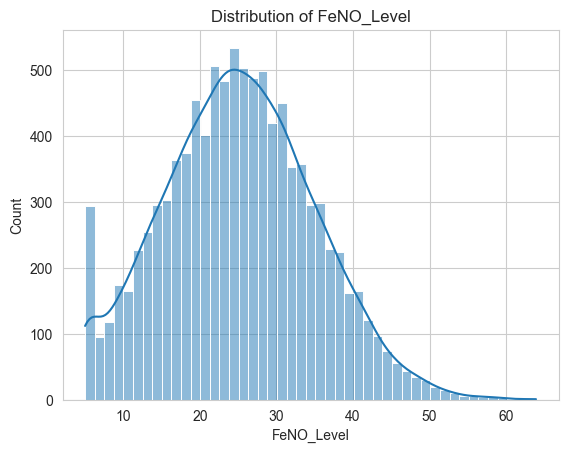

In [37]:
sns.histplot(df['FeNO_Level'], kde=True)
plt.title('Distribution of FeNO_Level')
plt.show()

In [38]:
result = stats.anderson(df['FeNO_Level'])
print(f"Anderson-Darling Statistic: {result.statistic:.4f}")
for i in range(len(result.critical_values)):
    sig_level, crit_val = result.significance_level[i], result.critical_values[i]
    print(f"At {sig_level}% significance level, critical value is {crit_val}")

Anderson-Darling Statistic: 3.8567
At 15.0% significance level, critical value is 0.576
At 10.0% significance level, critical value is 0.656
At 5.0% significance level, critical value is 0.787
At 2.5% significance level, critical value is 0.918
At 1.0% significance level, critical value is 1.092


In [39]:
h_stat, p_value = stats.kruskal(*result)
print(f"Kruskal-Wallis Test p-value = {p_value:.4f} {'Significant' if p_value < 0.05 else 'Not Significant'}")

Kruskal-Wallis Test p-value = 0.0379 Significant
